## 의사결정 나무
* 나무 모양의 그래프를 사용해서 최적의 결정을돕는 분석 기법
* 기회비용에 대한 고려, 기대이익계산, 위험관리등 효율적인 결정이 필요한 분야에 사용되고 있음
* 의사결정트리는 회귀/분류에 사용되지만, 주로 분류에 많이 사용

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# 가상의 데이터를 이용한 의사결정나무 분석
# centers ; 군집수
# cluster_std : 군집의 표준편차 (흩어짐 정도)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=2111091705)

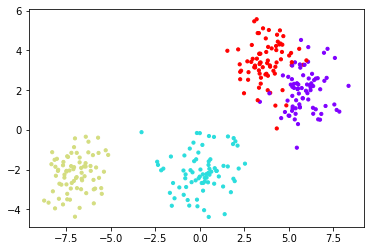

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', s=10)

In [9]:
# 의사결정트리로 분석후 시각화
dtclf = DecisionTreeClassifier()
dtclf.fit(X, y)

dtclf.score(X, y)


1.0

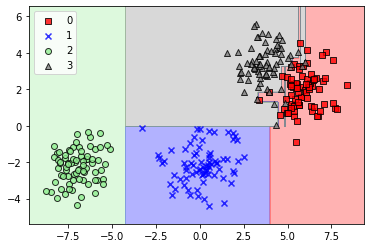

In [8]:
import mldlpy3
mldlpy3.plot_decision_regions(X, y, dtclf)

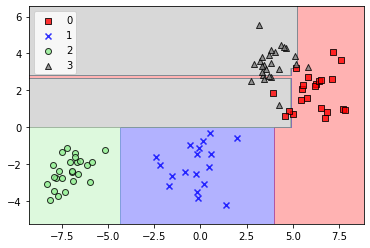

In [17]:
# 훈련/테스트 데이터로 나눠 재학습후 시각화
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3,random_state=2111091705)

# criterion : 정보이득 알고리즘 지정(CART, gini, entropy)
# max_depth :

dtclf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

accuracy_score(ytest, pred)

# mldlpy3.plot_decision_regions(Xtrain, ytrain, dtclf)

mldlpy3.plot_decision_regions(Xtest, ytest, dtclf)

## 분류결과를 tree형태로 시각화
* 출력하려면 graphviz 라이브러리 필요
* graphviz.org -> graphviz-2.49.3
    + win : C:/Java 아래에 압축해제 -> 폴더명은 graphviz-2.49로 설정 -> bin 폴더를 path로 설정
* Linux : yum install -y graphviz
* 파이썬 pydotplus 패키지도 필요 

In [20]:
import pydotplus 
from sklearn import tree

In [21]:
# 그래프 관련 dot 데이터 추출
dot_data = tree.export_graphviz(dtclf, out_file = None)
# dot 데이터를 토대로 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)

# 그래프를 그림파일로 저장
graph.write_png('img/blobs.png')

True

(-0.5, 1496.5, 636.5, -0.5)

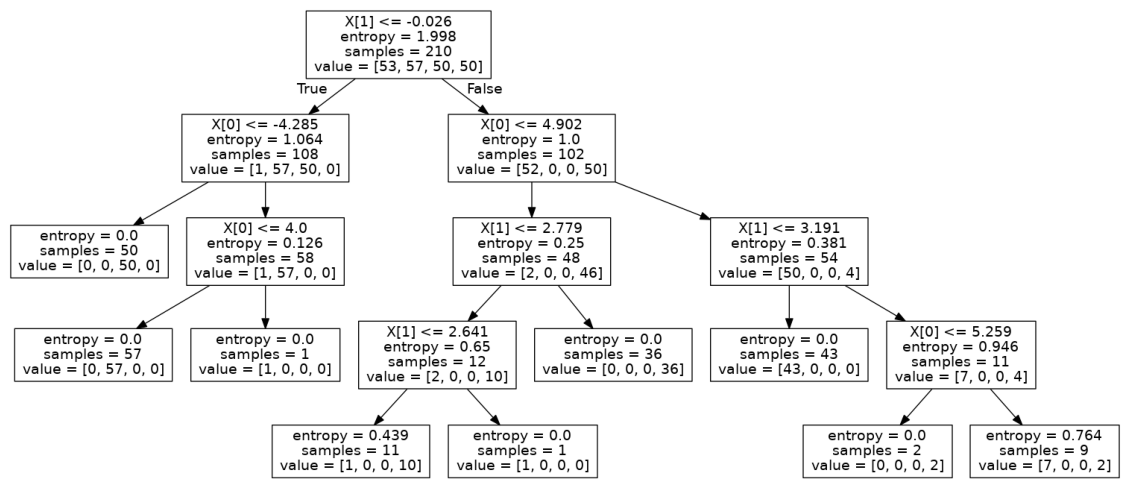

In [23]:
# 그림파일을 주피터에서 출력
import matplotlib.image as pltimg

img = pltimg.imread('img/blobs.png')

plt.figure(figsize=(20,12))
plt.imshow(img)
plt.axis('off')